<a href="https://colab.research.google.com/github/LucasMirandaVS/ml_studies/blob/main/Reconhecimento_de_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré Requisitos

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Importando os dados

In [3]:
from sklearn import datasets
digits = datasets.load_digits()

In [4]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [5]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


### Analisando os dados

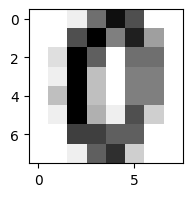

In [6]:
%matplotlib inline
plt.figure(figsize = (2,2))
plt.imshow(digits.images[10], cmap = plt.cm.gray_r)

# Implementando o SVM

In [7]:
# definindo o classifier do svm
classifier = svm.SVC()

In [8]:
# definindo o conjunto de treino e conjunto de testes
x = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=5)

In [9]:
# treinando o modelo
classifier.fit(x_train, y_train)
previsoes = classifier.predict(x_test)

# classificando o modelo
acertos = metrics.accuracy_score(y_test, previsoes)
print(acertos)

0.9851851851851852


98% de acerto ja é uma boa previsão

# Usando o modelo para leitura de imagens

In [10]:
img = mpimg.imread('number.png')
print(img)

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [0.8156863  0.8156863  0.8156863 ]
  [0.02745098 0.02745098 0.02745098]
  [0.69411767 0.69411767 0.69411767]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [0.69411767 0.69411767 0.69411767]
  [0.02745098 0.02745098 0.02745098]
  [0.         0.         0.        ]
  [0.5019608  0.5019608  0.5019608 ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.9372549  0.9372549  0.9372549 ]
  [0.3764706  0.3764706  0.3764706 ]
  [0.         0.         0.        ]
  [0.30980393 0.30980393 0.30980393]
  [0.         0.         0.        ]
  [0.69411767 0.69411767 0.69411767]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.5647059  0.5647059  0.5647059 ]
  [0.02745098 0.02745098 0.02745098]
  [0.627451   0.627451   0.62745

In [11]:
## Refazendo o treino com todos os dados
classifier.fit(x, y)

SVC()

In [12]:
#criando uma função pra converter em imagem

def rgb2gray(rgb):
    img_array = np.dot(rgb[...,:3], [0.299,0.587,0.114])
    img_array = (16 - (img_array * 16)).astype(int)
    img_array = img_array.flatten()
    return img_array

previsao = classifier.predict([rgb2gray(img)])
print(previsao)

[1]


 O modelo fez o reconhecimento corretamente

# Testando com regressão logística

In [13]:
logreg = LogisticRegression()
logreg.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
previsao_logreg = logreg.predict([rgb2gray(img)])
print(previsao_logreg)

[1]


O modelo de regressão também reconheceu a imagem corretamente